In [1]:
import random

def generate_random_window(size: int, max_value: int) -> tuple[int, int]:
    """
    Generate a random window (start, end) of given size within the range [0, max_value).

    Args:
        size (int): Size of the window.
        max_value (int): Maximum value (exclusive) for indices.

    Returns:
        tuple[int, int]: (start, end) indices of the window.
    """
    assert size > 0, f'size ({size}) must be positive'
    assert size <= max_value, f'size ({size}) must be <= max_value ({max_value})'
    start: int = random.randint(0, max_value - size)
    end: int = start + size
    return start, end

Found 61 zarr files:
- s1a-s2-raw-s-vh-20160727t060627-20160727t060648-012330-01331f_burst_0.zarr
- s1a-s1-raw-s-vv-20160825t111231-20160825t111302-012756-01415f_burst_1.zarr
- s1a-s1-raw-s-vv-20150323t070414-20150323t070447-005155-0067fc_burst_0.zarr
- s1a-s1-raw-s-vh-20150405t064819-20150405t064839-005345-006c77_burst_0.zarr
- s1a-s1-raw-s-vh-20141214t162845-20141214t162910-003717-0046b3_burst_0.zarr
- s1a-s2-raw-s-vv-20160517t093624-20160517t093645-011297-0111e4_burst_0.zarr
- s1a-s4-raw-s-vh-20150404t165234-20150404t165304-005336-006c36_burst_0.zarr
- s1a-s1-raw-s-vh-20150310t151720-20150310t151753-004971-00638c_burst_0.zarr
- s1a-s2-raw-s-vh-20160727t060627-20160727t060648-012330-01331f_burst_1.zarr
- s1b-s1-raw-s-vv-20161030t040436-20161030t040506-002731-0049fb_burst_0.zarr
- s1a-s1-raw-s-hh-20160609t060632-20160609t060653-011630-011c9b_burst_0.zarr
- s1a-s3-raw-s-hv-20160823t174042-20160823t174107-012731-014081_burst_0.zarr
- s1a-s1-raw-s-vh-20150407t062909-20150407t062939-00537

Shapes of arrays in s1b-s3-raw-s-vv-20200920t095205-20200920t095231-023457-02c8ec_burst_0.zarr: {'az': (48125, 21978), 'raw': (48125, 21978), 'rc': (48125, 21978), 'rcmc': (48125, 21978)}
DISPLAYED: s1b-s3-raw-s-vv-20200920t095205-20200920t095231-023457-02c8ec_burst_0.zarr with rows: 4000-12000 and cols: 4000-12000


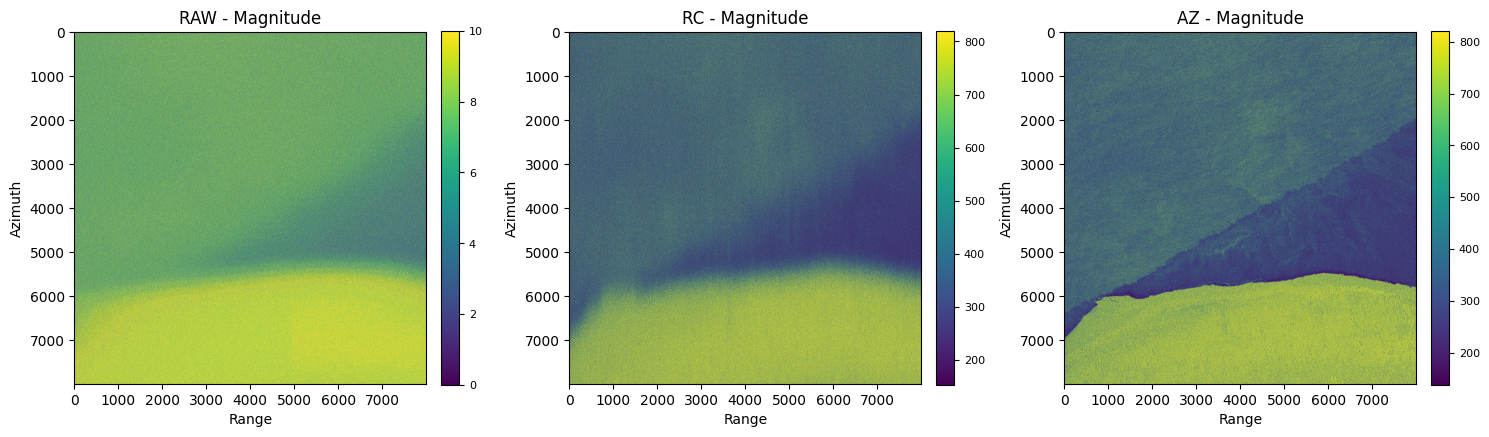

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sarpyx.utils.zarr_utils import ProductHandler
import os

data_dir = "/Data_large/marine/PythonProjects/SAR/sarpyx/focused_data"
zarr_files = [f for f in os.listdir(data_dir) if f.endswith('.zarr')]
print(f"Found {len(zarr_files)} zarr files:")


for idx, zarr_file in enumerate(zarr_files):
    
    if idx not in [48]:
        continue
    else:
        print(f"Processing file {idx+1}/{len(zarr_files)}: {zarr_file}")
        filepath = os.path.join('/Data_large/marine/PythonProjects/SAR/sarpyx/focused_data', zarr_file)
        pHandler = ProductHandler(filepath)
        shapes = pHandler.array_shapes
        H, W  = pHandler.array_shapes['raw']
        print(f"Shapes of arrays in {zarr_file}: {H}x{W}")

        row_start, row_end = 4000, 12000
        col_start, col_end = 4000, 12000

        print(f"DISPLAYED: {zarr_file} with rows: {row_start}-{row_end} and cols: {col_start}-{col_end}")

        pHandler.visualize_arrays(
            array_names=['raw','rc','az'], 
            rows=(row_start, row_end), 
            cols=(col_start, col_end),
            plot_type='magnitude',
            vminmax='auto',
        )
        
        

### Inspection of small products

In [7]:
# Check for zarr files with dimensions smaller than 5000x5000
small_files = []

for zarr_file in zarr_files:
    filepath = os.path.join(data_dir, zarr_file)
    try:
        handler = ProductHandler(filepath)
        file_shapes = handler.array_shapes
        file_h, file_w = file_shapes['raw']
        
        if file_h < 5000 or file_w < 5000:
            small_files.append({
                'filename': zarr_file,
                'dimensions': f'{file_h}x{file_w}',
                'height': file_h,
                'width': file_w
            })
            print(f'Small file found: {zarr_file} - Dimensions: {file_h}x{file_w}')
    except Exception as e:
        print(f'Error processing {zarr_file}: {e}')

print(f'\nSummary: Found {len(small_files)} files with dimensions smaller than 5000x5000')
if small_files:
    print('Files with small dimensions:')
    for file_info in small_files:
        print(f"  - {file_info['filename']}: {file_info['dimensions']}")

Small file found: s1a-s1-raw-s-hh-20160609t060632-20160609t060653-011630-011c9b_burst_0.zarr - Dimensions: 2416x25628
Small file found: s1a-s1-raw-s-vh-20150323t070439-20150323t070512-005155-0067fc_burst_0.zarr - Dimensions: 516x25604

Summary: Found 2 files with dimensions smaller than 5000x5000
Files with small dimensions:
  - s1a-s1-raw-s-hh-20160609t060632-20160609t060653-011630-011c9b_burst_0.zarr: 2416x25628
  - s1a-s1-raw-s-vh-20150323t070439-20150323t070512-005155-0067fc_burst_0.zarr: 516x25604


### Deletetion

In [ ]:
from sarpyx.utils.zarr_utils import ZarrManager
import shutil 


name = 's1a-s1-raw-s-hh-20160609t060632-20160609t060653-011630-011c9b_burst_0.zarr'
decoded_folder = '/Data_large/marine/PythonProjects/SAR/sarpyx/decoded_data'
path = os.path.join(decoded_folder, name)

handler = ZarrManager(file_path=path)

name = 's1a-s1-raw-s-vh-20150323t070439-20150323t070512-005155-0067fc_burst_0.zarr'
focused_folder = '/Data_large/marine/PythonProjects/SAR/sarpyx/focused_data'
path = os.path.join(focused_folder, name)
# delete
if os.path.exists(path):
    shutil.rmtree(path)
    print(f"Deleted focused data folder: {path}")